In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import svd
from PIL import Image

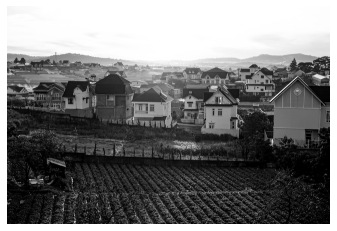

In [3]:
img = Image.open('original_image.jpg').convert('L')
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()
img.save('grayscale_image.png')

In [4]:
U, S, V = svd(img)

In [5]:
def approx_rank_k(U, S, V, k):
    Uk = U[:, :k]
    Sk = S[:k]
    Vk = V[:k, :]
    return np.around(Uk.dot(np.diag(Sk)).dot(Vk))

A_k = []
k_candidates = [5, 20, 40, 80, 100, 150]
for k in k_candidates:
    A_k.append(approx_rank_k(U, S, V,k))

In [6]:
plt.show()

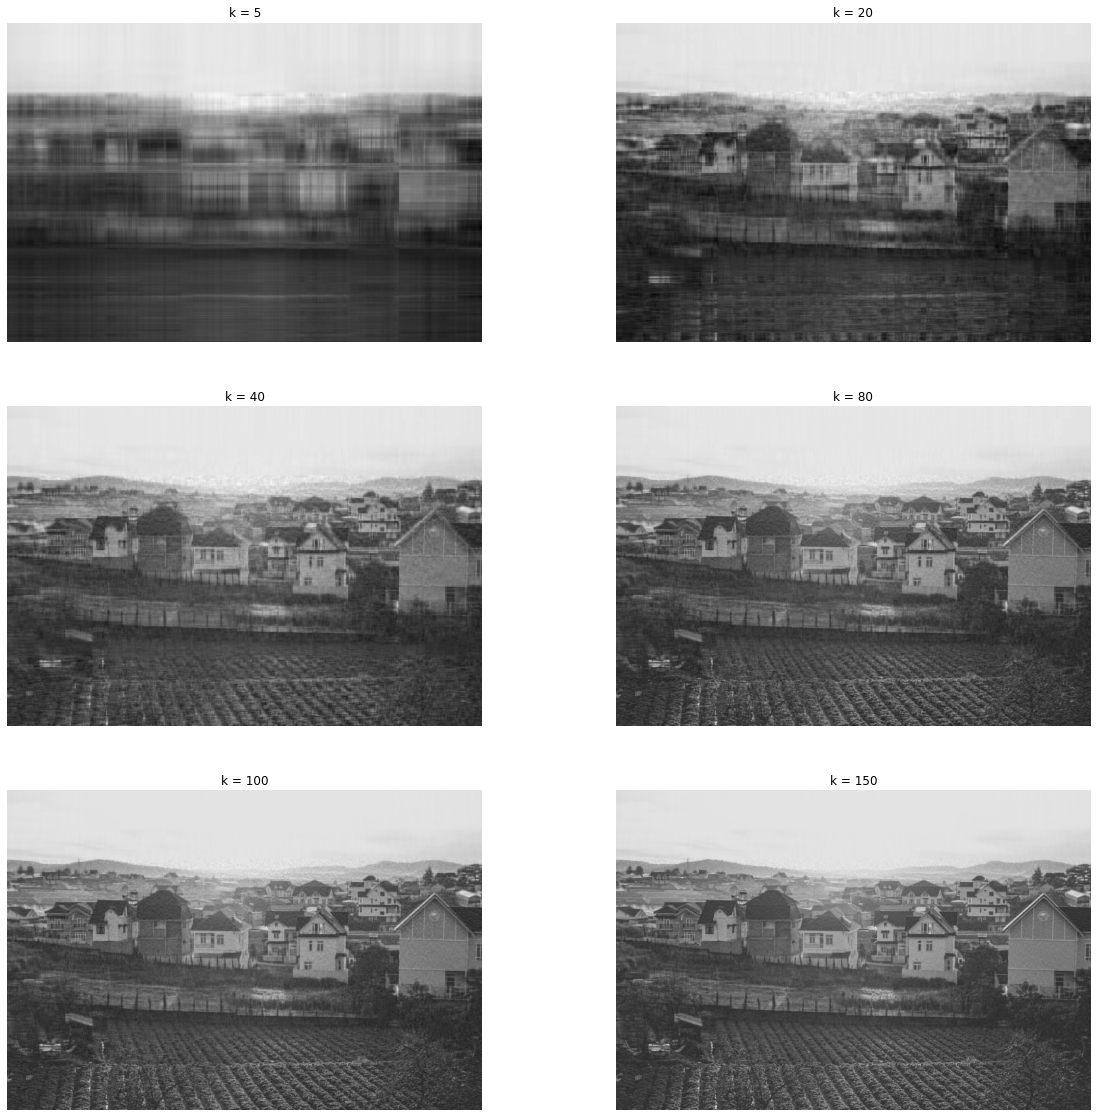

In [12]:
fig, axs = plt.subplots(3, 2, figsize=(20, 20))

idx = 0
for i in range(len(axs)):
    for j in range(len(axs[i])):
        axs[i][j].imshow(A_k[idx], cmap='gray')
        label = 'k = {}'.format(k_candidates[idx])
        axs[i][j].axis('off')
        axs[i][j].title.set_text(label)

        idx += 1

plt.savefig('compressed_images.png', transparent=True)